<a href="https://colab.research.google.com/github/hikaru122700/kaggle-pub/blob/GCI-titanic/2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 892.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 34.2 MB/s eta 0:00:00
   ━━━

In [ ]:
# このセルを実行したあとどうすればいいかがわからない方は、別途配布している、「GoogleColabにおけるドライブのマウントの仕方」と、Google Drive上でのフォルダ構造の説明のpdfファイルをご覧ください。

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
import warnings
import xgboost as xgb
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import os
from xgboost import XGBClassifier
from sklearn.svm import SVC
from functools import partial
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_validate
warnings.filterwarnings('ignore')

In [ ]:
# 読み込むデータが格納されたディレクトリのパス，必要に応じて変更の必要あり
# データの読み込み方がわからない方は、別途配布している、GoogleColabにおけるドライブのマウントの仕方、と、Google Drive上でのフォルダ構造の説明のpdfファイルをご覧ください。
path = "/content/drive/My Drive/松尾研/GCI/コンペ１/"
# path = "/content/drive/My Drive/kaggle/titanic/titanic_data/"

df = pd.read_csv(path + 'train.csv')
df_test = pd.read_csv(path + 'test.csv')
if path == "/content/drive/My Drive/kaggle/titanic/titanic_data/":
    df.rename(columns={'Survived':'Perished'}, inplace=True)

In [ ]:
df.head(10)

,PassengerId,Perished,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,1,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,1,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,1,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,1,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
age = pd.concat([df['Age'], df_test['Age']])
fare = pd.concat([df['Fare'], df_test['Fare']])
age_mode = age.mode()[0]
print(age_mode)
df['Age'].fillna(age_mode, inplace=True)
df_test['Age'].fillna(age_mode, inplace=True)

df['Fare'].fillna(fare.mean(), inplace=True)
df_test['Fare'].fillna(fare.mean(), inplace=True)

df.isnull().sum()
print(df_test.isnull().sum())

24.0
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [ ]:
df.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)

df.isnull().sum()

,0
PassengerId,0
Perished,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df['Embarked'].fillna('S', inplace=True)
df_test['Embarked'].fillna('S', inplace=True)

df.isnull().sum()

,0
PassengerId,0
Perished,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.head(20)

,PassengerId,Perished,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,1,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,1,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q
6,7,1,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,1,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [ ]:
df.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)
df_test.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)

df.head()

,PassengerId,Perished,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,1,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [ ]:
embarked = pd.concat([df['Embarked'], df_test['Embarked']])

embarked_ohe = pd.get_dummies(embarked)

embarked_ohe_train = embarked_ohe[:891]
embarked_ohe_test = embarked_ohe[891:]

df = pd.concat([df, embarked_ohe_train], axis=1)
df_test = pd.concat([df_test, embarked_ohe_test], axis=1)

df.drop('Embarked', axis=1, inplace=True)
df_test.drop('Embarked', axis=1, inplace=True)

df.head()

,PassengerId,Perished,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S
0,1,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,False,True
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,True,False,False
2,3,0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,False,True
4,5,1,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,False,True


In [ ]:
df['Family'] = df['SibSp'] + df['Parch']
df_test['Family'] = df_test['SibSp'] + df_test['Parch']

df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
df_test.drop(['SibSp', 'Parch'], axis=1, inplace=True)
df.head(10)

,PassengerId,Perished,Pclass,Name,Sex,Age,Ticket,Fare,C,Q,S,Family
0,1,1,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,False,False,True,1
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,True,False,False,1
2,3,0,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,False,False,True,0
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,False,False,True,1
4,5,1,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,False,False,True,0
5,6,1,3,"Moran, Mr. James",0,24.0,330877,8.4583,False,True,False,0
6,7,1,1,"McCarthy, Mr. Timothy J",0,54.0,17463,51.8625,False,False,True,0
7,8,1,3,"Palsson, Master. Gosta Leonard",0,2.0,349909,21.0750,False,False,True,4
8,9,0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,347742,11.1333,False,False,True,2
9,10,0,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,237736,30.0708,True,False,False,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Perished     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   C            891 non-null    bool   
 9   Q            891 non-null    bool   
 10  S            891 non-null    bool   
 11  Family       891 non-null    int64  
dtypes: bool(3), float64(2), int64(5), object(2)
memory usage: 65.4+ KB


In [ ]:
df.drop('Name', axis=1, inplace=True)
df_test.drop('Name', axis=1, inplace=True)
df.drop('PassengerId', axis=1, inplace=True)
df_test.drop('PassengerId', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df_test.drop('Ticket', axis=1, inplace=True)

In [ ]:
df

,Perished,Pclass,Sex,Age,Fare,C,Q,S,Family
0,1,3,0,22.0,7.2500,False,False,True,1
1,0,1,1,38.0,71.2833,True,False,False,1
2,0,3,1,26.0,7.9250,False,False,True,0
3,0,1,1,35.0,53.1000,False,False,True,1
4,1,3,0,35.0,8.0500,False,False,True,0
...,...,...,...,...,...,...,...,...,...
886,1,2,0,27.0,13.0000,False,False,True,0
887,0,1,1,19.0,30.0000,False,False,True,0
888,1,3,1,24.0,23.4500,False,False,True,3
889,0,1,0,26.0,30.0000,True,False,False,0


In [ ]:
from pycaret.classification import *
s = setup(df, target = 'Perished', session_id = 123, polynomial_features = True)

,Description,Value
0,Session id,123
1,Target,Perished
2,Target type,Binary
3,Original data shape,"(891, 9)"
4,Transformed data shape,"(891, 45)"
5,Transformed train set shape,"(623, 45)"
6,Transformed test set shape,"(268, 45)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [ ]:

top3_models = compare_models(n_select=3)
# 最良モデルの抽出
best = top3_models[0]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8313,0.8724,0.9059,0.8358,0.8688,0.6333,0.6396,0.2830
ridge,Ridge Classifier,0.8216,0.8621,0.9111,0.8204,0.8630,0.6093,0.6177,0.0450
xgboost,Extreme Gradient Boosting,0.8200,0.8635,0.8669,0.8457,0.8555,0.6166,0.6186,0.1750
lightgbm,Light Gradient Boosting Machine,0.8185,0.8642,0.8723,0.8405,0.8552,0.6117,0.6148,0.6550
lda,Linear Discriminant Analysis,0.8184,0.8633,0.9111,0.8170,0.8610,0.6012,0.6102,0.0430
rf,Random Forest Classifier,0.8120,0.8596,0.8643,0.8369,0.8490,0.5993,0.6035,0.4740
lr,Logistic Regression,0.8089,0.8473,0.8877,0.8178,0.8503,0.5860,0.5936,0.2400
ada,Ada Boost Classifier,0.8041,0.8401,0.8721,0.8228,0.8453,0.5780,0.5848,0.1650
et,Extra Trees Classifier,0.7912,0.8415,0.8253,0.8347,0.8285,0.5609,0.5639,0.2190
dt,Decision Tree Classifier,0.7545,0.7503,0.7841,0.8124,0.7960,0.4870,0.4908,0.0520


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8313,0.8724,0.9059,0.8358,0.8688,0.6333,0.6396,0.2780
ridge,Ridge Classifier,0.8216,0.8621,0.9111,0.8204,0.8630,0.6093,0.6177,0.0460
xgboost,Extreme Gradient Boosting,0.8200,0.8635,0.8669,0.8457,0.8555,0.6166,0.6186,0.1670
lightgbm,Light Gradient Boosting Machine,0.8185,0.8642,0.8723,0.8405,0.8552,0.6117,0.6148,0.9340
lda,Linear Discriminant Analysis,0.8184,0.8633,0.9111,0.8170,0.8610,0.6012,0.6102,0.0470
rf,Random Forest Classifier,0.8120,0.8596,0.8643,0.8369,0.8490,0.5993,0.6035,0.4520
lr,Logistic Regression,0.8089,0.8473,0.8877,0.8178,0.8503,0.5860,0.5936,0.2380
ada,Ada Boost Classifier,0.8041,0.8401,0.8721,0.8228,0.8453,0.5780,0.5848,0.1980
et,Extra Trees Classifier,0.7912,0.8415,0.8253,0.8347,0.8285,0.5609,0.5639,0.2230
dt,Decision Tree Classifier,0.7545,0.7503,0.7841,0.8124,0.7960,0.4870,0.4908,0.0510


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

In [ ]:

# functional API
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

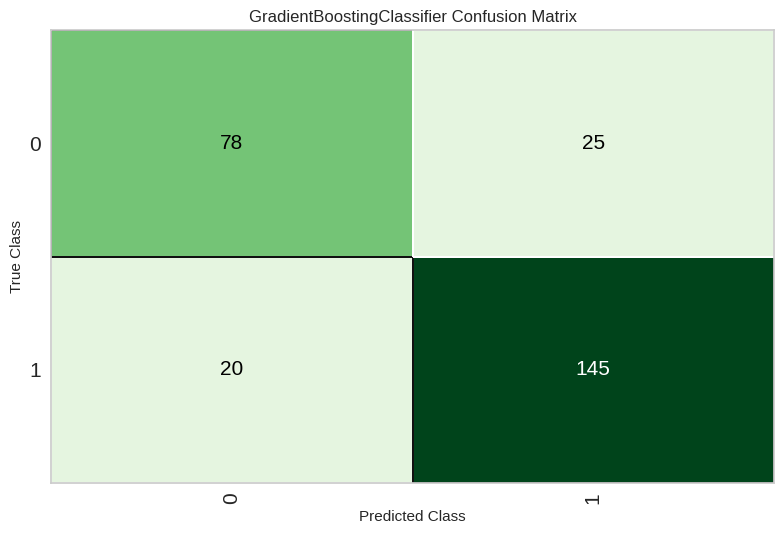

In [ ]:

# functional API
plot_model(best, plot = 'confusion_matrix')

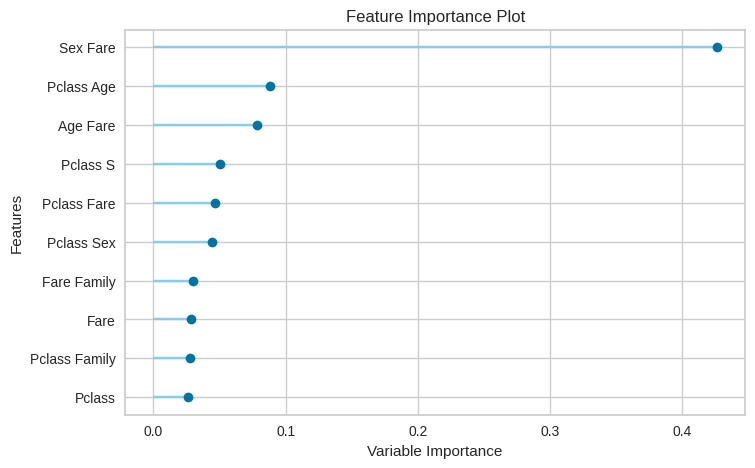

In [ ]:
# モデルの評価
from pycaret.classification import plot_model
plot_model(best, plot="feature")

In [ ]:
# 各モデルのハイパーパラメーターをチューニング
tuned_models = [tune_model(model) for model in top3_models]

# 5. 上位3つのモデルのブレンド
blended_model = blend_models(estimator_list=tuned_models)

# 6. ブレンドモデルの評価
evaluate_model(blended_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8730,0.8157,0.9744,0.8444,0.9048,0.7172,0.7339
1,0.8571,0.9177,0.9487,0.8409,0.8916,0.6845,0.6952
2,0.8095,0.9209,0.8718,0.8293,0.8500,0.5896,0.5910
3,0.7742,0.8125,0.8684,0.7857,0.8250,0.5090,0.5141
4,0.8065,0.8542,0.8947,0.8095,0.8500,0.5792,0.5850
5,0.8226,0.9046,0.9474,0.8000,0.8675,0.6049,0.6249
6,0.8226,0.8706,0.9211,0.8140,0.8642,0.6112,0.6209
7,0.8710,0.9013,0.9211,0.8750,0.8974,0.7238,0.7256
8,0.7419,0.8273,0.8947,0.7391,0.8095,0.4206,0.4394


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.8178,0.9487,0.8409,0.8916,0.6845,0.6952
1,0.8730,0.9220,0.9487,0.8605,0.9024,0.7219,0.7289
2,0.8571,0.9370,0.8974,0.8750,0.8861,0.6947,0.6951
3,0.7742,0.8037,0.8421,0.8000,0.8205,0.5167,0.5179
4,0.7742,0.8158,0.8947,0.7727,0.8293,0.5011,0.5130
5,0.8065,0.8893,0.8947,0.8095,0.8500,0.5792,0.5850
6,0.8226,0.8564,0.9211,0.8140,0.8642,0.6112,0.6209
7,0.8548,0.8695,0.9211,0.8537,0.8861,0.6869,0.6906
8,0.7097,0.8065,0.8684,0.7174,0.7857,0.3481,0.3637


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8413,0.8520,0.9744,0.8085,0.8837,0.6404,0.6687
1,0.8254,0.9295,0.9487,0.8043,0.8706,0.6078,0.6277
2,0.8095,0.9263,0.9231,0.8000,0.8571,0.5758,0.5892
3,0.8065,0.8333,0.8947,0.8095,0.8500,0.5792,0.5850
4,0.8065,0.8289,0.9474,0.7826,0.8571,0.5654,0.5908
5,0.8226,0.8838,0.9737,0.7872,0.8706,0.5984,0.6335
6,0.7903,0.8695,0.8947,0.7907,0.8395,0.5405,0.5491
7,0.8548,0.9243,0.9474,0.8372,0.8889,0.6819,0.6928
8,0.7097,0.7692,0.9211,0.7000,0.7955,0.3261,0.3650


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,0.0000,0.9744,0.8636,0.9157,0.7546,0.7665
1,0.8889,0.0000,0.9487,0.8810,0.9136,0.7586,0.7627
2,0.8413,0.0000,0.8718,0.8718,0.8718,0.6635,0.6635
3,0.8065,0.0000,0.8421,0.8421,0.8421,0.5921,0.5921
4,0.8226,0.0000,0.8947,0.8293,0.8608,0.6173,0.6207
5,0.8387,0.0000,0.9211,0.8333,0.8750,0.6493,0.6558
6,0.8065,0.0000,0.8947,0.8095,0.8500,0.5792,0.5850
7,0.8548,0.0000,0.9211,0.8537,0.8861,0.6869,0.6906
8,0.7419,0.0000,0.8947,0.7391,0.8095,0.4206,0.4394


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:

# functional API
predictions = predict_model(blended_model, data=df_test)
predictions.head()

,Pclass,Sex,Age,Fare,C,Q,S,Family,prediction_label
0,3,0,34.5,7.8292,False,True,False,0,1
1,3,1,47.0,7.0000,False,False,True,1,1
2,2,0,62.0,9.6875,False,True,False,0,1
3,3,0,27.0,8.6625,False,False,True,0,1
4,3,1,22.0,12.2875,False,False,True,2,1


In [ ]:
pred = predictions['prediction_label']
pred

,prediction_label
0,1
1,1
2,1
3,1
4,1
...,...
413,1
414,0
415,1
416,1


In [ ]:
# 読み込むデータが格納されたディレクトリのパス，必要に応じて変更の必要あり
# path = "/content/drive/My Drive/松尾研/GCI/コンペ１/"
submission = pd.read_csv(path + 'gender_submission.csv')
submission
if path ==  "/content/drive/My Drive/松尾研/GCI/コンペ１/":
    submission["Perished"] = pred
else:
    submission["Survived"] = pred

print(submission)
#  もしkaggleに提出する場合は以下のコードを実行す
# submission.rename(columns={'Perished': 'Survived'}, inplace=True)

     PassengerId  Perished
0            892         1
1            893         1
2            894         1
3            895         1
4            896         1
..           ...       ...
413         1305         1
414         1306         0
415         1307         1
416         1308         1
417         1309         0

[418 rows x 2 columns]


In [ ]:
# Google Drive・Google Colaboratoryで作業する場

if submission.columns[1] == 'Survived':
    submission.to_csv('submission_to_kaggle_titanic.csv', index=False)
    correct = pd.read_csv("/content/drive/My Drive/松尾研/GCI/コンペ１/correct.csv")
    ans = 0
    for i in range(len(correct)):
      if correct['Survived'][i] == submission['Survived'][i]:
            ans += 1
    print(f"あなたの正解率は{ans/len(correct)}です")
else:
    submission.to_csv('submission.csv',index=False)
    print("submission.csvをOmnicampusに提出してください")
submission.head(9)
# from google.colab import files
# files.download('submission.csv')

submission.csvをOmnicampusに提出してください


,PassengerId,Perished
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1
5,897,1
6,898,0
7,899,1
8,900,0
